# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters import Interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.8777777777777778

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

dog    0.977778
cat    0.777778
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

Not implemented


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence,accuracy
36,0.453120,0.995101,0.901340,1,0,0.896440,0.5
26,0.429895,0.990874,0.850664,1,0,0.841538,0.5
27,0.421562,0.999366,0.842491,1,0,0.841856,0.5
22,0.407181,0.999580,0.813943,1,0,0.813524,0.5
25,0.398916,0.997656,0.795489,1,0,0.793146,0.5


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence,accuracy
15,0.348121,0.441356,0.745113,0,1,0.303758,1.0
6,0.262741,0.778716,0.695801,1,1,0.474517,1.0
14,0.236969,0.999176,0.473113,1,0,0.526063,1.0
7,0.282095,0.992473,0.556663,1,0,0.549136,0.5
37,0.277587,0.999786,0.554960,1,0,0.554746,0.5


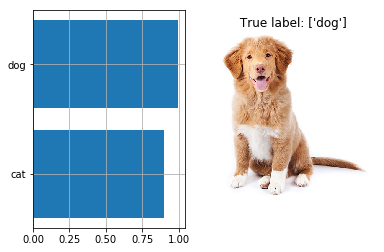

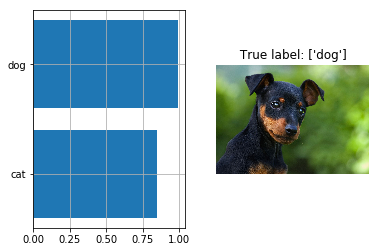

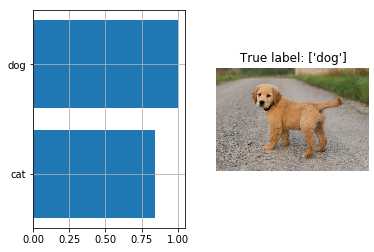

In [15]:
interpreter.plot_most_incorrect_samples(3)

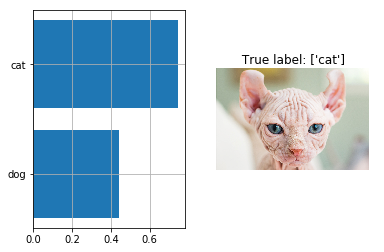

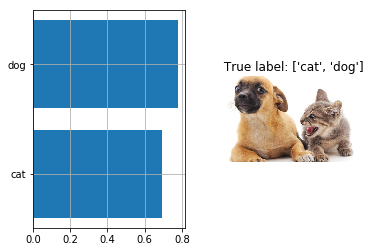

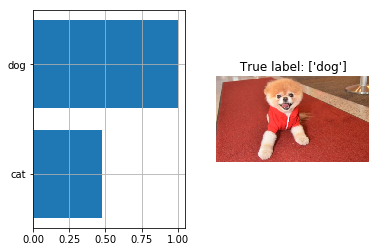

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=44), Output()), _do…